<b><font size="5">Data Visualization with Plotly. </font></b>
<br><br>
While it still is not as popular as Matplotlib and Seaborn, Plotly is another Python library that is used to design graphs. You can use it to create visualizations that are similar to the ones you've created in the last week. However, Plotly comes with the added flavor of allowing the creation of interactive graphs, thus allowing for much more engaging experience.

In this notebook, we will explore some of the main components and features associated with working with Plotly. We will also explore some of the more advanced features of Plotly. You can find more information about Plotly [here](https://plot.ly/python/). 

### <font color='#BFD72F'>Table of Contents </font> <a class="anchor" id='toc'></a> 

- [1. Plotly Express](#P1) 
    - [Plots](#P1.1)
    - [Customization Options](#P1.2)
- [2. Plotly Graph Objects](#P2) 
    - [Creating and customizing visualizations](#P2.1)
- [3. Advanced Options](#P3)    
- [3. Try it out](#P4)

### <font color='#BFD72F'>1. Plotly Express</font> <a class="anchor" id="P1"></a>
  [Back to TOC](#toc)

  Plotly is a framework that draws a lot of inspiration from Javascript and uses a syntax that may be confusing. Plotly Express is a high-level API that allows us to interact with Plotly Graph Objects (covered later in the notebook) and create interactive visualizations with very few lines of code. You can find more information about Plotly Express [here](https://plot.ly/python/plotly-express/).

  **Step 0:** Import the necessary libraries.

In [117]:
# Import libraries and define the alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#we are going to generate colormaps
import matplotlib.colors as mcolors

#install plotly
#!pip install plotly

#plotly importation
import plotly.express as px #plotly express
import plotly.graph_objects as go #plotly graph objects

In [118]:
# Import datasets
netflix = pd.read_csv('data/netflix_dataset.csv', index_col=0)
weather = pd.read_csv('data/austin_weather.csv', parse_dates=['Date'], 
                    usecols=['Date', 'TempHighF', 'TempAvgF', 'TempLowF']) #parse_dates: convert the column to datetime format

#check the first 5 rows of netflix dataset
netflix.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [119]:
#check the first 5 rows of weather dataset
weather.head()

,Date,TempHighF,TempAvgF,TempLowF
0,2013-12-21,74,60,45
1,2013-12-22,56,48,39
2,2013-12-23,58,45,32
3,2013-12-24,61,46,31
4,2013-12-25,58,50,41
...,...,...,...,...
1314,2017-07-27,103,89,75
1315,2017-07-28,105,91,76
1316,2017-07-29,107,92,77
1317,2017-07-30,106,93,79


#### Plots <a class="anchor" id="P1.1"></a>

Plotly Express has many prebuilt functions that allow us to create different types of plots. We will explore the most important ones below.

***1. Line Plot***

A lineplot is a type of plot that displays information as a series of data points connected by straight line segments. It is a basic type of chart common in many fields. Use the `px.line` function to create a line plot. You can find more information about the function [here](https://plot.ly/python-api-reference/generated/plotly.express.line.html).


**Step 1** Use Plotly Express to create a basic Line Plot of `TempAvgF` over Date `weather`. <br>

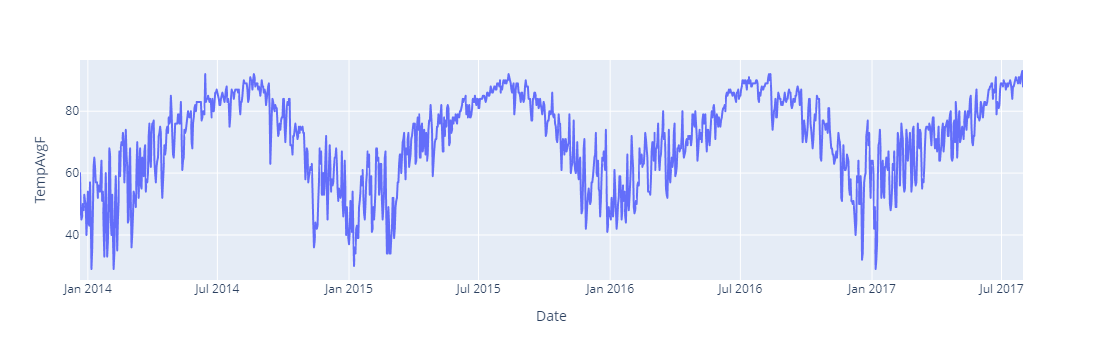

In [120]:
#Create a line chart with plotly express
fig = px.line(data_frame=weather, x='Date', y='TempAvgF') #These are positional arguments
fig.show()

Similar to what been done with Matplotlib and Seaborn, Plotly Express allows us to plot multiple lines at the same time. We can do this by passing in a list of columns to the `y` parameter.

**Step 1.1** Create a Line Plot of `TempAvgF` and `TempHighF` over Date on `weather`.<br>

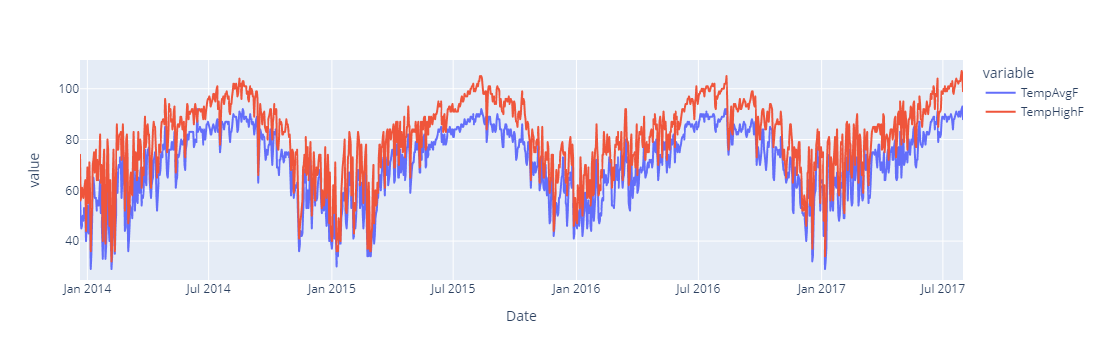

In [121]:
#Create a line chart with plotly express
fig = px.line(data_frame=weather, x='Date', 
              y=['TempAvgF', 'TempHighF']) # passing list as argument
fig.show()

***Scatter Plots***

A scatter plot is a type of plot that displays values for two variables for a set of data. The data is displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. Use the `px.scatter` function to create a scatter plot. You can find more information about the function [here](https://plot.ly/python-api-reference/generated/plotly.express.scatter.html).

**Step 2** Use Plotly Express to create a basic Scatter Plot of `TempAvgF` over Date on `weather`. <br>

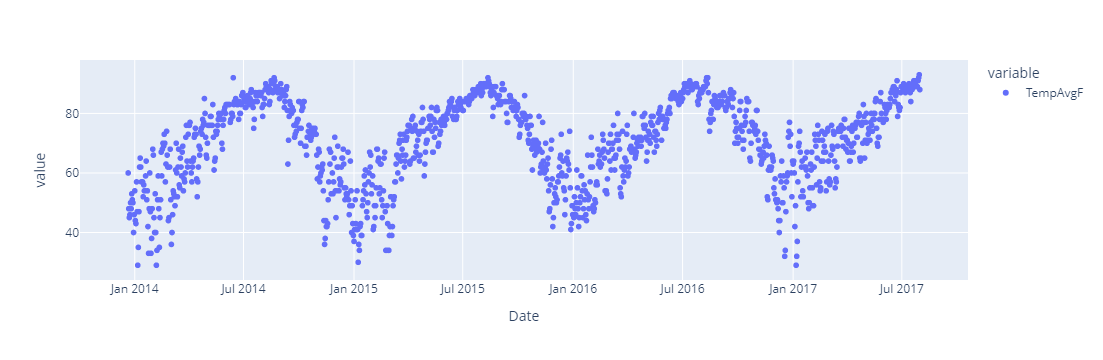

In [122]:
#Create a scatter plot with plotly express
fig = px.scatter(data_frame=weather, x='Date', 
              y='TempAvgF') # passing list as argument
fig.show()

**Step 2.1** Create a Scatter Plot of `TempAvgF` and `TempHighF` and `TempLowF` over Date on `weather`. <br>

In [123]:
#Create a scatter plot with plotly express
fig = px.scatter(data_frame=weather, x='Date', 
              y=['TempAvgF', 'TempHighF', 'TempLowF']) # passing list as argument
fig.show()

***3. Histograms***

A histogram is a graphical representation of the distribution of numerical data. Use the `px.histogram` function to create a histogram. You can find more information about the function [here](https://plot.ly/python-api-reference/generated/plotly.express.histogram.html).

**Step 3** Create a basic with the distribution with of the `TemAvgF` in the `weather` dataset<br>

In [124]:
#create a histogram with plotly express
fig = px.histogram(data_frame=weather, x='TempAvgF')
fig.show()

You can also introduce some additional granularity to the histogram by having it display the distribution of the data based on a specific column. You can do this by passing in the column name to the `color` parameter.

**Step 3.1** Create a histogram with the distribution of the `TempAvgF` in the `weather` dataset based on the month.<br>

In [125]:
#create month column
weather['Month'] = weather['Date'].dt.month_name()

#create a histogram with plotly express that shows the color for each subscription type
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month')
fig.show()

The previous plot stacks the histograms on top of each other. We can also display the individual distributions of each month by passing in the `barmode` parameter and setting it to `overlay`.

**Step 3.2** Create a histogram with the distribution of the `TempAvgF` in the `weather` dataset based on the month. Set the `barmode` parameter to `overlay`.<br>

In [126]:
#create a histogram with plotly express that shows the color for each subscription type
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month', barmode='overlay')
fig.show()

Overlay provides a way to visualize the individual distributions of each month. However, depending at the number of classes you have (in this case 12) it may not be the best way to compare distributions. A cool option you have, that is transferable to other plots, is the parameter `marginal`. This parameter allows you to display the distribution of the data on the x and y axis. You can find more information about the parameter [here](https://plot.ly/python/reference/#histogram2d-marginal).

**Step 3.3** Create a histogram with the distribution of the `TempAvgF` in the `weather` dataset based on the month. Set the `barmode` parameter to `overlay` and the `marginal` parameter to `box`.<br>

In [127]:
#create a histogram with plotly express that shows the color for each subscription type
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month', barmode='overlay', marginal='box')
fig.show()

**4. Box Plots**

A box plot is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages. Use the `px.box` function to create a box plot. You can find more information about the function [here](https://plot.ly/python-api-reference/generated/plotly.express.box.html).

**Step 4** Create a box plot of the y = `TempAvgF` in the `weather` dataset.<br>

In [128]:
#create box plot with plotly express
fig = px.box(data_frame=weather, y = 'TempAvgF')
fig.show()

You can change the axis of the box plot by passing in the column name to `x` instead of `y`.

**Step 4.1** Create a box plot of the x = `TempAvgF` in the `weather` dataset.<br>

In [129]:
#create box plot with plotly express
fig = px.box(data_frame=weather, x = 'TempAvgF')
fig.show()

In addition, you can also introduce some additional granularity to the box plot by having it display the distribution of the data based on a specific column. You can do this by passing in a different color to the other axis. 

**Step 4.2** Create a box plot of the y = `TempAvgF` in the `weather` dataset. Set x = `Month`.<br>

In [130]:
#create box plot with plotly express
fig = px.box(data_frame=weather, y = 'TempAvgF', x = 'Month') # Group by the month: useful to check correlation between variable and target
fig.show()

**5. Bar Plots**

A bar plot is a type of plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Use the `px.bar` function to create a bar plot. You can find more information about the function [here](https://plot.ly/python-api-reference/generated/plotly.express.bar.html).

**Step 5** Create a bar plot of the `Monthly Revenue` per `Subscription Type` in the `netflix` dataset.<br>

In [131]:
#create bar chart with plotly express x = 'Subscription Type' and y as the sum of 'Monthly Revenue' for the subscription type
fig = px.bar(data_frame=netflix, x='Subscription Type', y='Monthly Revenue') #by default plotly sums the values per category
fig.show()

In [132]:
#check
netflix.groupby('Subscription Type')['Monthly Revenue'].sum()

Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64

Just as before, you can also add a third dimension to the bar plot by passing a `color` parameter.

**Step 5.1** Create a bar plot of the `Monthly Revenue` per `Country` in the `netflix` dataset. Set the `color` parameter to `Subscription Type`.<br>

In [133]:
#create bar chart with plotly express x = 'Subscription Type' and y as the sum of 'Monthly Revenue' for the subscription type
fig = px.bar(data_frame=netflix, x='Country', y='Monthly Revenue', color='Subscription Type') #by default plotly sums the values per category
fig.show()

Another alternative way of showing the data is by unstacking the bars. You can do this by passing in the `barmode` parameter and setting it to `group` (This is also true for other plots such as histograms).

**Step 5.2** Create a bar plot of the `Monthly Revenue` per `Country` in the `netflix` dataset. Set the `color` parameter to `Subscription Type` and the `barmode` parameter to `group`.<br>

In [134]:
fig = px.bar(data_frame=netflix, x='Country', y='Monthly Revenue', color='Subscription Type', barmode='group')
fig.show()

Still, this does not allow us to compare the data as easily as we would like as all we can see when we hover are individual subscriptions. One possible way of solving this comes from changing the data before we plot it. For example, we can create a pivot table that has the `Subscription Type` as the columns and the `Country` as the index. This will allow us to see the total revenue per country and subscription type.

**Step 5.3** Create a long format table containing with the sum `Monthly Revenue` per `Country` and `Subscription Type` in the `netflix` dataset. <br>
Recreate the bar plot from Step 5.2 using the new table.<br> 
What changed? 

In [135]:
#create grouped data
netflix_gb = netflix.groupby(['Country', 'Subscription Type'])['Monthly Revenue'].sum().reset_index()

#create bar chart with plotly express x = 'Subscription Type' and y as the sum of 'Monthly Revenue' for the subscription type. The bars should now be grouped by 'Country'
fig = px.bar(data_frame=netflix_gb, x='Country', y='Monthly Revenue', color='Subscription Type', barmode='group')
fig.show()

For a full list of the different types of plots you can create with Plotly Express, you can visit the [documentation](https://plotly.com/python-api-reference/plotly.express.html).

#### Customization Options <a class="anchor" id="P1.2"></a>

Plotly Express also allows us to customize the plots we create. While not as extensive as Plotly Graph Objects, Plotly Express still provides us with a lot of options. In this section, we will explore some of the most common ones. For more details, you can visit the [documentation](https://plotly.com/python/figure-labels/).

***1. Title and Axis Title***

px functions allow us to add a title to the plot by passing in the `title` parameter.

**Step 6** Recreate the plot from Step 1.1 and add the following title to it: "Temperatures in Austin, TX"<br>

In [136]:
fig = px.line(data_frame=weather, x='Date', y='TempAvgF', title='Temperature in Austin, TX')
fig.show()

Just as in Matplotlib and Seaborn, we can also add a title to the x and y axis by passing in the `labels` parameter. Moreover, it is also possible to change the colors, font size, and font family of these titles through the method `update_layout`. You can find more information about the method [here](https://plotly.com/python/reference/layout/).

**Step 6.1** Recreate the plot from Step 1.2 and add the following title to it: "Temperatures in Austin, TX". Set the `labels` parameter to `{"Date": "Dates", "value": "Temperature (F)"}`. 

Change the title to have change its font into: 
- title_font_size = 50
- title_font_family = "Times New Roman"
- title_font_family = "seagreen"

In [137]:
fig = px.line(data_frame=weather, x='Date', y=['TempAvgF', 'TempHighF'], title='Temperature in Austin, TX', 
              labels={'Date':'Dates', 
                     'value':'Temperature (F)'})

#update the title
fig.update_layout(
                title_font_family='Times New Roman',
                title_font_color='seagreen',
                title_font_size=50,
                )
fig.show()

You can also change the font and color of the axis titles. For that, you can use `update_xaxes` and `update_yaxes` methods.

**Step 6.2** Recreate the previous plot and change the font of the X axis title to:<br>
- font_family = "Courier New"
- font_color = "blue"

Also, change the font of the Y axis title to:<br>
- font_family = "Webdings"
- font_color = "red"
- font_size = 30

In [138]:
fig = px.line(data_frame=weather, x='Date', y=['TempAvgF', 'TempHighF'], title='Average Temperature in Austin, TX')

#update the title
fig.update_layout(
                title_font_family='Times New Roman',
                title_font_color='seagreen',
                title_font_size=50,
                )

#update the x-axis
fig.update_xaxes(
                title_text='Dates',
                title_font_family='Courier New',
                title_font_color='blue',
                )

#update the y-axis
fig.update_yaxes(
                title_text='Temperature (F)',
                title_font_family='Webdings',
                title_font_color='red',
                title_font_size=30,
                )

fig.show()

***2. Legend***

Plotly Express also allows us to customize the legend of the plot. For example, we can where the legend is located, its title, customize fonts. Another relavant possibility is setting in which order the legend is displayed. You can find more information about the legend [here](https://plotly.com/python/legend/).

Before we start, let us remember the plot from **Step 3.2**.

In [139]:
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month', barmode='overlay')
fig.show()

**Step 7** Recreate the previous plot, but change the order of the legend to be `January, February, March, April, May, June, July, August, September, October, November, December`.<br>
To do this, you will need to pass in the `category_orders` parameter to the `px.histogram` function.<br>
You can find more information about the parameter [here](https://plotly.com/python/reference/#histogram-category_orders).<br>

In [140]:
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month', barmode='overlay',
                   category_orders={'Month':['January', 'February', 'March', 'April', 'May', 'June', 
                                             'July', 'August', 'September', 'October', 'November','December']})
fig.show()

You can make additional changes to the legend by using the `update_layout` method. For example, you can change the title of the legend by passing in the `legend_title` parameter. 

**Step 7.1** Recreate the previous plot, but use the `update_layout` method on the following parameters:<br>
- showlegend = True
- legend: {'title' : 'Months', <br>
            'bgcolor' : 'LightSteelBlue',<br>
            'bordercolor' : 'black',<br>
            'borderwidth' : 2<br>
            }

In [141]:
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month', barmode='overlay',
                   category_orders={'Month':['January', 'February', 'March', 'April', 'May', 'June', 
                                             'July', 'August', 'September', 'October', 'November','December']})

#update_figure
fig.update_layout({
    'showlegend':True,
    'legend':{
            'title' : 'Months',
            'bgcolor':'LightSteelBlue',
            'bordercolor':'Black',
            'borderwidth':2,
            }})

fig.show()

***3. Colors***

From the previous plot, we can see that Plotly's default colormap is, well, serviceable but not perfect. Fortunately, Plotly Express allows us to change the colormap of the plot by passing in the `color_discrete_sequence` parameter. You can find more information about the parameter [here](https://plotly.com/python/discrete-color/).

**Step 8** Recreate the previous plot, but change the color of the bars to a different set of colors.<br>
**Step 8.1** Create a color dictionary mapping the month names to a color of your choosing<br>

In [142]:
#color dict
color_dict = {'January': '#D00000',
              'February': '#008490',
              'March': '#580000',
              'April': '#001563',
              'May': '#005B46',
              'June': '#6D017F',
              'July': '#F75D50',
              'August': '#EB6B02',
              'September': '#98000D',
              'October': '#ffba08',
              'November': '#231942',
            'December': '#000000'}

**Step 8.2** Recreate the previous plot, but change the color of the bars to the colors in the dictionary you created in Step 8.1.<br>

In [143]:
fig = px.histogram(data_frame=weather, x='TempAvgF', color='Month', barmode='overlay',
                   category_orders={'Month':['January', 'February', 'March', 'April', 'May', 'June', 
                                             'July', 'August', 'September', 'October', 'November','December'],
                                             }
                    , color_discrete_map=color_dict)

#update_figure
fig.update_layout({
    'showlegend':True,
    'legend':{
            'title' : 'Months',
            'bgcolor':'LightSteelBlue',
            'bordercolor':'Black',
            'borderwidth':2,
            }})

fig.show()

### <font color='#BFD72F'>2. Plotly Graph Objects</font> <a class="anchor" id="P2"></a>
  [Back to TOC](#toc)

Plotly Graph Objects is a lower-level API that allows us to create more customized visualizations. The syntax of Graph Objects is more complex than the simple wrapper of Plotly Express and can be thought of as building visualizations from the ground up. In other words, Plotly Graph Objects requires us to specify every aspect of the visualization we want to create. Want a specific chart type? You need to call it. Want to add labels? You need to specify which and where. Want a legend? You need to specify it. 

While this may seem like a lot of work, this also gives us the flexibility to create charts that would not be possible to obtain with Plotly ExpressYou can find more information about Plotly Graph Objects [here](https://plot.ly/python/graph-objects/).

#### Creating Visualizations <a class="anchor" id="P2.1"></a>

Let us start with a simple lineplot. To create this lineplot using Plotly Graph Objects, we need to create a `figure` object and then add a `scatter` trace to it. You can find more information about the `figure` object [here](https://plotly.com/python/reference/#layout) and then add a `scatter` object [here](https://plotly.com/python/reference/#scatter).

**Step 9** Create a line plot of `TempAvgF` over `Date` in the `weather` dataset<br>
**Step 9.1** Create an empty figure using `go.Figure()`.<br>

In [144]:
#create empty instance of figure
fig = go.Figure()
fig.show()

**Step 9.2** Create a line plot by using `add_trace` for variable `TempAvgF` in `weather`<br>

In [145]:
fig.add_trace(go.Scatter(x=weather['Date'], y=weather['TempAvgF'], name='Average Temperature F'))
fig.show()

**Step 9.3** Add two additional traces for `TempHighF` and `TempLowF` in `weather`. The first should be a `scatter` and the second should be a a dashed line with markers<br>

In [146]:
#add scatter for TempHighF
fig.add_trace(go.Scatter(x=weather['Date'], y=weather['TempHighF'], name='High Temperature F',
                         mode='markers', marker=dict(color='#FA1234', size=5, symbol='diamond')))

#adding line + markers to the plot
fig.add_trace(go.Scatter(x=weather['Date'], y=weather['TempLowF'], name='Low Temperature F',
                         mode='lines+markers', marker=dict(color='#008490', size=5, symbol='star'),
                         line=dict(color='#008490', width=2, dash='dash')))
fig.show()

**Step 9.4** Add a title to the plot. Set the title to bold and center the title.<br>

In [147]:
#add a title to the plot

fig.update_layout(title = dict(text="<b>Temperatures in Austin, TX</b>",  #markdown text
                               font=dict(family='Arial', size=20, color='#000000'),
                               xanchor = 'center', x = 0.5, yanchor='top', y=0.95),)
fig.show()

<img src="https://miro.medium.com/v2/resize:fit:875/0*eU6H-gxRpslRHfNT.jpg" alt="Markdown tags" width="600">

**Step 9.5** Add a title to the x and y axis. Set the title to bold and italic<br>

In [148]:
#add axis titles
fig.update_xaxes(title_text='<b><i>Dates</i></b>', title_font=dict(family='Arial', size=15, color='#000000'))
fig.update_yaxes(title_text='<b><i>Temperature (F)</i></b>', title_font=dict(family='Arial', size=15, color='#000000'))
fig.show()

**Step 9.6** Update the ticks of X to be trimestral (Q1 2014, Q2 2014,...), and the ticks of y to start at `0` and have the number for every 10 values.<br>

In [149]:
fig.update_layout(yaxis=dict(range=[0, 120]))

#update x-axis to have Q Year format for every 3 months 
fig.update_xaxes(tickfont=dict(family='Arial', size=10, color='#000000'),
                    tickformat = "Q%q %Y",
                    dtick = "M3")

#update y-axis to have a range from 0 to 120
fig.update_yaxes(
    tickmode = 'linear',
    dtick = 10
)

**If you notice, what we did was create a figure, add traces and then updated the layout. This is a common pattern when working with Plotly Graph Objects.** In order to showcase that, we will create a bar plot.

**Step 10** Overwrite `fig` to create a bar plot of the `Monthly Revenue` per `Country` in the `netflix` dataset.<br>

In [150]:
#graph objects 
fig = go.Figure(go.Bar(x=netflix['Country'], y=netflix['Monthly Revenue'], name='Monthly Revenue'))
fig.show()

**Step 10.1** Create a new `fig` with color taking into consideration the `Device` used.<br>
**Step 10.1.1** Create a new column `color` in `netflix` that maps `Device` to a color of your choosing.<br>

In [151]:
# Assuming netflix is your DataFrame and 'Device' is your device column
devices = netflix['Device'].unique()

# Create a list of colors for the number of unique devices
colors = plt.cm.rainbow(np.linspace(0, 1, len(devices)))

# Convert RGBA colors to hexadecimal format
hex_colors = [mcolors.to_hex(c) for c in colors]

# Create a dictionary mapping each device to a color
device_color_dict = dict(zip(devices, hex_colors))

# Create a new column in the DataFrame for the color associated with each device
netflix['DeviceColor'] = netflix['Device'].map(device_color_dict)

**Step 10.1.2** Create a new `fig` with color taking into consideration the `Device` used.<br>

In [152]:
# Create the figure
fig = go.Figure(go.Bar(
    x=netflix['Country'], 
    y=netflix['Monthly Revenue'], 
    name='Monthly Revenue',
    marker_color=netflix['DeviceColor']  # use the new color column here
))

fig.show()

This is not very helpful, right? Ño legend, no clear labels, no title... Let's fix that.

**Step 10.2** Create a new `fig` in a different format with color taking into consideration the `Device` used.<br>
**Step 10.2.1** Create a new dataframe `netflix_dev_gb` that groups the sum  of `Monthly Revenue` and the average `Age` by `Country`, `Device` and `DeviceColor`<br>

In [153]:
netflix_dev_gb = netflix.groupby(['Country', 'Device', 'DeviceColor']).agg({
                                                                            'Monthly Revenue': 'sum',
                                                                            'Age': 'mean',
                                                                            }).reset_index()
#show
netflix_dev_gb.head()

,Country,Device,DeviceColor,Monthly Revenue,Age
0,Australia,Laptop,#ff0000,582,38.361702
1,Australia,Smart TV,#d4dd80,469,39.157895
2,Australia,Smartphone,#8000ff,677,38.709091
3,Australia,Tablet,#2adddd,543,37.186047
4,Brazil,Laptop,#ff0000,551,39.227273


**Step 10.2.2** Create a new `fig` with color taking into consideration the `Device` used.<br>

In [154]:
# Create the figure
fig = go.Figure(go.Bar(
    x=netflix_dev_gb['Country'], 
    y=netflix_dev_gb['Monthly Revenue'], 
    name='Monthly Revenue',
    marker_color=netflix_dev_gb['DeviceColor']  # use the new color column here
))

fig.show()   
                                                                            

**Step 10.2.3** Add a legend to the plot. Set the title of the `legend` to country.<br>
**Hint:** This may require you to create a trace for each unique value in `Device`.<br>

In [155]:
# Assuming netflix_dev_gb is your DataFrame
fig = go.Figure()

# Get the unique devices
devices = netflix_dev_gb['Device'].unique()

# Create a separate trace for each device
for device in devices:
    df = netflix_dev_gb[netflix_dev_gb['Device'] == device]
    fig.add_trace(go.Bar(
        x=df['Country'], 
        y=df['Monthly Revenue'], 
        name=device,  # the name will be used in the legend
        marker_color=df['DeviceColor']
    ))

fig.show()

**Step 10.2.4** Add a title to the legend. Set the title to bold and center the title.<br>

In [156]:
#add legend title
fig.update_layout(legend_title_text='<b>Device Type</b>', legend_title_font_size=20)
fig.show()

### <font color='#BFD72F'>3. Advanced Options</font> <a class="anchor" id="P3"></a>
  [Back to TOC](#toc)

***1. Subplots***

Plotly also allows us to create subplots. Subplots are a way of displaying multiple plots in the same figure. You can find more information about subplots. It is possible to create subplots with Plotly Express and Plotly Graph Objects. However, we will focus on Plotly Express as it provides us with easier implementation. You can find more information about subplots [here](https://plot.ly/python/subplots/). An easy implemetation of subplots is to use the `facet_col` parameter. You can find more information about the parameter [here](https://plot.ly/python-api-reference/generated/plotly.express.scatter.html).

**Step 11** Create a subplot with the following plots:<br>
- Line plot of `TempAvgF` over `Month` in the `weather` dataset

In [161]:
#create subplot per month
fig = px.histogram(data_frame=weather, x='TempAvgF', facet_col='Month',
                   category_orders={'Month':['January', 'February', 'March', 'April', 'May', 'June',
                                             'July', 'August', 'September', 'October', 'November','December'],
                                             })
fig.show()

You can customize the subplots by setting the number of rows and columns by using the parameter nrow and ncol. You can find more information about the parameter [here](https://plot.ly/python-api-reference/generated/plotly.subplots.make_subplots.html).

**Step 11.1** Create a subplot for the same data with 6 columns and 2 columns<br>

In [163]:
#create subplot per month 6 columns and 2 rows
fig = px.histogram(data_frame=weather, x='TempAvgF', facet_col='Month', facet_col_wrap=6, #this method ensure 6 columns
                   category_orders={'Month':['January', 'February', 'March', 'April', 'May', 'June',
                                             'July', 'August', 'September', 'October', 'November','December'],
                                             })

fig.show()

***2. Annotations***

Making annotations is a great way to add additional information to your plots. You can find more information about annotations [here](https://plot.ly/python/text-and-annotations/).

**Step 12** Create a line plot of `TempAvgF` over `Date` in the `weather` dataset. Add an annotation for the hottest day<br>

In [164]:
#create line plot
fig = px.line(data_frame=weather, x='Date', y='TempAvgF', title='Average Temperature in Austin, TX')

#add annotation for the highest temperature
fig.add_annotation(
    x=weather['Date'][weather['TempAvgF'].idxmax()], #find the index of the highest temperature; like argmax
    y=weather['TempAvgF'].max(), #find the highest temperature
    text="Highest Temperature",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig.show()

**Step 12.1** Add an annotation to fig for the coldest day<br>

In [165]:
#add annotation for the lowest temperature
fig.add_annotation(
    x=weather['Date'][weather['TempAvgF'].idxmin()], #find the index of the highest temperature
    y=weather['TempAvgF'].min(), #find the highest temperature
    text="Lowest Temperature",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=40
)

fig.show()

***3. Hover Text***

The final customization we will explore is the hover text. Hover text is a great way to add additional information to your plots. You can find more information about hover text [here](https://plot.ly/python/hover-text-and-formatting/).

**Step 13** Recreate the bar plot of showing the `Monthly Revenue` per `Country` and `Type of Device`<br>

In [166]:
# Assuming netflix_dev_gb is your DataFrame
fig = go.Figure()

# Get the unique devices
devices = netflix_dev_gb['Device'].unique()

# Create a separate trace for each device
for device in devices:
    df = netflix_dev_gb[netflix_dev_gb['Device'] == device]
    fig.add_trace(go.Bar(
        x=df['Country'], 
        y=df['Monthly Revenue'], 
        name=device,  # the name will be used in the legend
        marker_color=df['DeviceColor']
    ))

#add title
fig.update_layout(title_text='<b>Ugly Colors Kept on Purpose</b>', title_font_size=20)

fig.show()

**Step 13.1** Using the same logic, recreate the plot with a hover text showing `Country`, `Monthly Revenue` and `Age` for each bar.<br>
**Hint:** You can do this using `hover_template` and `hovertext` parameters.

In [167]:
fig = go.Figure()

# Get the unique devices
devices = netflix_dev_gb['Device'].unique()

# Create a separate trace for each device
for device in devices:
    df = netflix_dev_gb[netflix_dev_gb['Device'] == device]
    fig.add_trace(go.Bar(
        x=df['Country'], 
        y=df['Monthly Revenue'], 
        name=device,  # the name will be used in the legend
        marker_color=df['DeviceColor'],
        hovertemplate=
        '<i>Country</i>: %{x}<br>' +
        '<b>Monthly Revenue</b>: %{y}<br>' +
        '<b>Age</b>: %{hovertext}',  # assuming Age is another column
        hovertext=df['Age']  # this line is needed to use Age in the hovertemplate
    ))

# Add title
fig.update_layout(title_text='<b>Ugly Colors Kept on Purpose</b>', title_font_size=20)

fig.show()

**Step 13.2** Remake the previous plot with the same customizations as before, but now on Plotly Express.<br>

In [168]:
#doing the same with plotly express
fig = px.bar(data_frame=netflix_dev_gb, x='Country', y='Monthly Revenue', color='Device', barmode='group',
             hover_data=['Country', 'Monthly Revenue', 'Age'], color_discrete_map=device_color_dict)

# Add title
fig.update_layout(title_text='<b>Ugly Colors Kept on Purpose</b>', title_font_size=20)

#update the hovertemplate
fig.update_traces(hovertemplate=
        '<i>Country</i>: %{x}<br>' +
        '<b>Monthly Revenue</b>: %{y}<br>' +
        '<b>Age</b>: %{customdata[0]}',  # customdata is created from hover_data, in this case from the only column that is not x or y
        )

fig.show()

This was, by no means, an extensive preview of what Plotly can do. However, it should give you a good idea of what is possible with Plotly. For a more extensive list of the different types of plots you can create with Plotly Express, you can visit the [documentation](https://plot.ly/python-api-reference/plotly.express.html). If you want to learn more about Plotly Graph Objects, you can visit the [documentation](https://plot.ly/python/graph-objects/).

### <font color='#BFD72F'>3. Try it out </font> <a class="anchor" id="P3"></a>
  [Back to TOC](#toc)

  **Exercise 0** Use plotly to create a sunburst plot of the `netflix` dataset. The plot should show the `Monthly Revenue` per `Country`, `Subscription Type` and `Device`.<br>

In [171]:
fig = px.sunburst(data_frame=netflix, path=['Country', 'Subscription Type', 'Device'], values='Monthly Revenue')
fig.show()

**Exercise 1** Update the hover message of the previous plot to be:<br>
        '<b>Current level</b>: `label`<br>' +
        '<b>Path</b>: `id`<br>' +
        '<b>Monthly Revenue</b>: `value`$'<br>'` 

In [170]:
#change hovertext of the sunburst
fig.update_traces(hovertemplate=
        '<b>Current level</b>: %{label}<br>' +
        '<b>Path</b>: %{id}<br>' +
        '<b>Monthly Revenue</b>: %{value}$ <br>' 
        )

fig.show()

**Exercise 2** Create a Map of the `netflix` dataset. The plot should have the color represent the sum of `Monthly Revenue` per `Country`.<br>

In [172]:
#create a new df with the sum of monthly revenue per country
netflix_sum = netflix.groupby('Country')['Monthly Revenue'].sum().reset_index()

#plotly express map for country with the sum of monthly revenue
fig = px.choropleth(data_frame=netflix_sum, locations='Country', color='Monthly Revenue', locationmode='country names')
fig.show()

**Exercise 3** Recreate the previous plot, but now add a title to the plot, change the legend title to `Monthly Revenue ($)` and change the color of the map to a different color scale of your choosing. You can check the available colormaps [here](https://plot.ly/python/builtin-colorscales/).<br>

In [173]:
#plotly express map for country with the sum of monthly revenue
fig = px.choropleth(data_frame=netflix_sum, locations='Country', color='Monthly Revenue', locationmode='country names',
                    color_continuous_scale='Burg', title='<b>Monthly Revenue per Country</b>',
                    labels={'Monthly Revenue':'<b>Monthly Revenue ($)</b>'})

fig.show()

#### That's all for today and feel free to complement your knowledge with online documentation.